# Implementing Simon's Algorithm

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler
import matplotlib.pyplot as plt

simulator = AerSimulator()

def quasi_probs_to_counts(quasi_probs, shots):
    counts = {}
    for bitstring, quasi_prob in quasi_probs.items():
        counts[bitstring] = int(round(quasi_prob * shots))
    return counts



     ┌───┐     ┌───┐              ┌─┐   
q_0: ┤ H ├──■──┤ H ├──────────────┤M├───
     ├───┤  │  ├───┤     ┌─┐      └╥┘   
q_1: ┤ H ├──┼──┤ H ├─────┤M├───────╫────
     ├───┤  │  ├───┤     └╥┘┌─┐    ║    
q_2: ┤ H ├──┼──┤ H ├──────╫─┤M├────╫────
     ├───┤  │  ├───┤      ║ └╥┘┌─┐ ║    
q_3: ┤ H ├──┼──┤ H ├──────╫──╫─┤M├─╫────
     ├───┤  │  └───┘┌───┐ ║  ║ └╥┘ ║ ┌─┐
q_4: ┤ H ├──┼────■──┤ H ├─╫──╫──╫──╫─┤M├
     └───┘┌─┴─┐  │  └───┘ ║  ║  ║  ║ └╥┘
q_5: ─────┤ X ├──┼────────╫──╫──╫──╫──╫─
          └───┘  │        ║  ║  ║  ║  ║ 
q_6: ────────────┼────────╫──╫──╫──╫──╫─
                 │        ║  ║  ║  ║  ║ 
q_7: ────────────┼────────╫──╫──╫──╫──╫─
                 │        ║  ║  ║  ║  ║ 
q_8: ────────────┼────────╫──╫──╫──╫──╫─
               ┌─┴─┐      ║  ║  ║  ║  ║ 
q_9: ──────────┤ X ├──────╫──╫──╫──╫──╫─
               └───┘      ║  ║  ║  ║  ║ 
c: 5/═════════════════════╩══╩══╩══╩══╩═
                          1  2  3  0  4 
Simon's Algorithm:
{0: 231, 1: 255, 16: 274, 17: 264}


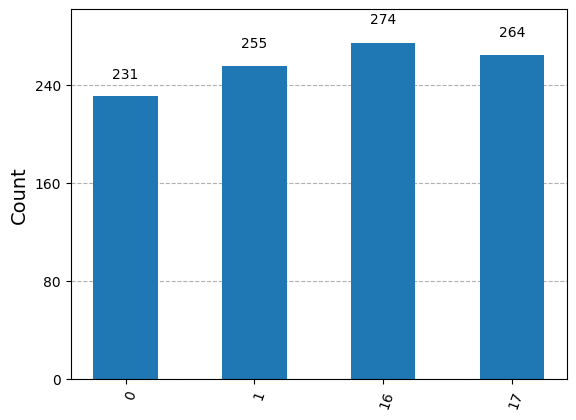

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler
import matplotlib.pyplot as plt

simulator = AerSimulator()


def quasi_probs_to_counts(quasi_probs, shots):
    counts = {}
    for bitstring, quasi_prob in quasi_probs.items():
        counts[bitstring] = int(round(quasi_prob * shots))
    return counts

# Simon's Algorithm Implementation

n = int(input())  # Number of qubits in the function input
s = input() # Secret string
simon_circuit = QuantumCircuit(2*n, n)

# Apply Hadamard gates
simon_circuit.h(range(n))

# Oracle for f(x) = f(x ⊕ s)
for i in range(n):
    if s[i] == '1':
        simon_circuit.cx(i, i + n)

# Apply Hadamard gates
simon_circuit.h(range(n))


simon_circuit.measure(range(n), range(n))


print(simon_circuit)
simon_circuit = transpile(simon_circuit, simulator)
sampler = Sampler()
result = sampler.run([simon_circuit], shots=1024).result()
quasi_probs = result.quasi_dists[0]
counts = quasi_probs_to_counts(quasi_probs, 1024)
print("Simon's Algorithm:")
print(counts)
plot_histogram(counts)
    
    